In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\BR\spotify_top_1000_tracks.csv")

In [5]:
df

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min
0,All The Stars (with SZA),Kendrick Lamar,Black Panther The Album Music From And Inspire...,2018-02-09,95,https://open.spotify.com/track/3GCdLUSnKSMJhs4...,3GCdLUSnKSMJhs4Tj6CV3s,3.869767
1,Starboy,The Weeknd,Starboy,2016-11-25,90,https://open.spotify.com/track/7MXVkk9YMctZqd1...,7MXVkk9YMctZqd1Srtv4MB,3.840883
2,Señorita,Shawn Mendes,Señorita,2019-06-21,80,https://open.spotify.com/track/0TK2YIli7K1leLo...,0TK2YIli7K1leLovkQiNik,3.182667
3,Heat Waves,Glass Animals,Dreamland,2020-08-07,87,https://open.spotify.com/track/3USxtqRwSYz57Ew...,3USxtqRwSYz57Ewm6wWRMp,3.980083
4,Let Me Love You,DJ Snake,Encore,2016-08-05,87,https://open.spotify.com/track/0lYBSQXN6rCTvUZ...,0lYBSQXN6rCTvUZvg9S0lU,3.432433
...,...,...,...,...,...,...,...,...
995,Lily,ISAEV,Lily,2023-02-24,0,https://open.spotify.com/track/4tVhDkvh6N4lrTy...,4tVhDkvh6N4lrTyNeZHYuz,2.572100
996,Apologize,Besomorph,Apologize,2020-05-08,5,https://open.spotify.com/track/0Uo43DNldd7aNxi...,0Uo43DNldd7aNxizhKgowg,2.443350
997,I’m Good,Yohan Gerber,I’m Good,2023-05-19,0,https://open.spotify.com/track/2aZL4EjY5aPKWTO...,2aZL4EjY5aPKWTO7RKuWiy,2.376000
998,Down,Arc North,Down,2020-07-02,1,https://open.spotify.com/track/6nQZG4G0vIrQWaC...,6nQZG4G0vIrQWaCGbqHCQn,2.391667


In [ ]:
##Which artist appears most frequently in the top 1000 tracks?

In [11]:
df["artist"].value_counts().idxmax()

'The Weeknd'

In [ ]:
##What is the distribution of track popularity?

In [21]:
bins = [0,20,40,60,80,100]
labels = ["Very low","Low","Moderate","Popular","Very Popular"]

In [29]:
df["Popularity_Level"] = pd.cut(df["popularity"],bins = bins, labels = labels, include_lowest = True)

In [31]:
df.tail()

,track_name,artist,album,release_date,popularity,spotify_url,id,duration_min,Popularity_Level
995,Lily,ISAEV,Lily,2023-02-24,0,https://open.spotify.com/track/4tVhDkvh6N4lrTy...,4tVhDkvh6N4lrTyNeZHYuz,2.572100,Very low
996,Apologize,Besomorph,Apologize,2020-05-08,5,https://open.spotify.com/track/0Uo43DNldd7aNxi...,0Uo43DNldd7aNxizhKgowg,2.443350,Very low
997,I’m Good,Yohan Gerber,I’m Good,2023-05-19,0,https://open.spotify.com/track/2aZL4EjY5aPKWTO...,2aZL4EjY5aPKWTO7RKuWiy,2.376000,Very low
998,Down,Arc North,Down,2020-07-02,1,https://open.spotify.com/track/6nQZG4G0vIrQWaC...,6nQZG4G0vIrQWaCGbqHCQn,2.391667,Very low
999,Chandelier,Besomage,Chandelier,2023-01-04,0,https://open.spotify.com/track/1Ea8I3MoGx36FfA...,1Ea8I3MoGx36FfAmrjzo1r,2.295650,Very low


In [37]:
df.groupby("Popularity_Level")["track_name"].count().reset_index(name = "Track Count")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_36108\1977170890.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Popularity_Level")["track_name"].count().reset_index(name = "Track Count")


,Popularity_Level,Track Count
0,Very low,153
1,Low,126
2,Moderate,122
3,Popular,398
4,Very Popular,201


In [ ]:
##What is the average duration of the top tracks?

In [47]:
df[df["Popularity_Level"].isin(["Very Popular", "Popular"])].groupby("track_name")["duration_min"].mean()

track_name
10,000 Hours (with Justin Bieber)    2.794883
2002                                 3.116433
22                                   3.868667
2step                                2.560433
5% TINT                              3.268967
                                       ...   
telepatía                            2.669850
thank u, next                        3.455333
waves - Tame Impala Remix            4.222433
whoa (mind in awe)                   2.629600
wish you were gay                    3.692383
Name: duration_min, Length: 583, dtype: float64

In [ ]:
##Which track has the highest popularity?

In [59]:
df.groupby("track_name")["popularity"].mean().sort_values().idxmax()

'That’s So True'

In [61]:
##How many unique albums are represented in the dataset?

In [69]:
df["album"].nunique()

822

In [ ]:
##Are there any artists with multiple tracks from the same album?

In [89]:
tracks = df.groupby(['artist', 'album']).size().reset_index(name='track_count')
tracks[tracks['track_count'] > 1]

,artist,album,track_count
26,Adele,21,2
27,Adele,25,2
35,Alan Walker,Different World,7
54,Anne-Marie,Speak Your Mind (Deluxe),4
57,Aqua,Aquarium (Special Edition),4
...,...,...,...
764,The Weeknd,House Of Balloons (Original),2
766,The Weeknd,"My Dear Melancholy,",2
767,The Weeknd,Starboy,6
770,The Weeknd,Trilogy,2


In [ ]:
##What is the most common release year among the top tracks?

In [107]:
df['release_date'] = pd.to_datetime(df["release_date"], errors = 'coerce')
df['release_year'] = df["release_date"].dt.year.astype('Int64')

In [125]:
df.groupby('release_year')['track_name'].count().reset_index(name = "No of songs released").max()

release_year            2025
No of songs released     137
dtype: Int64

In [ ]:
##Is there a relationship between track duration and popularity?

In [133]:
df[["duration_min","popularity"]].corr()	

,duration_min,popularity
duration_min,1.000000,0.256154
popularity,0.256154,1.000000


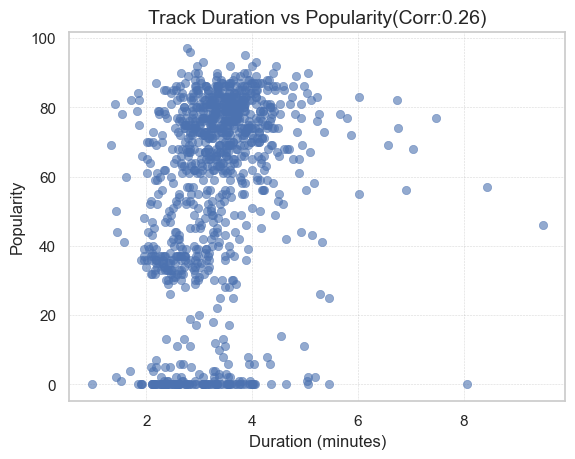

In [151]:
sns.scatterplot(x = "duration_min", y = "popularity", data = df, alpha = 0.6, edgecolor=None )
plt.title("Track Duration vs Popularity(Corr:0.26)", fontsize=14)
plt.xlabel("Duration (minutes)")
plt.ylabel("Popularity")
plt.grid(True, color='gray', linestyle='--', linewidth=0.4, alpha=0.3)

In [157]:
"""The correlation between track duration and popularity is approximately 0.26 — a weak positive relationship.What this means is Longer songs tend to be slightly more popular, but the connection is not strong and There’s a wide spread in popularity regardless of duration."""

'The correlation between track duration and popularity is approximately 0.26 — a weak positive relationship.What this means is Longer songs tend to be slightly more popular, but the connection is not strong and There’s a wide spread in popularity regardless of duration.'

In [ ]:
##How many tracks were released each year?

In [159]:
df.groupby('release_year')['track_name'].count().reset_index(name = "No of songs released")

,release_year,No of songs released
0,1981,1
1,1992,1
2,1996,1
3,1997,5
4,1998,1
5,2000,4
6,2001,1
7,2002,6
8,2003,5
9,2004,4


In [ ]:
##Which albums have the most tracks in the top 1000?

In [173]:
df.groupby("album")["track_name"].count().reset_index(name = "Track count").sort_values("Track count",ascending = False).head(10)

,album,Track count
680,The Best Damn Thing (Expanded Edition),17
176,Different World,7
629,Starboy,6
623,Speak Your Mind (Deluxe),6
820,÷ (Deluxe),5
419,Lover,5
166,Dangerous Woman,5
523,PRISM,4
434,Make You Mine,4
168,Dawn FM,4


In [ ]:
##What is the average popularity of tracks by artist?

In [181]:
df.groupby("artist")["popularity"].mean().reset_index(name = "Average Popularity")

,artist,Average Popularity
0,24kGoldn,79.0
1,2WEI,4.0
2,347aidan,68.5
3,5 Seconds of Summer,83.0
4,54GODART,37.0
...,...,...
521,sped up nightcore,55.0
522,t.A.T.u.,79.0
523,vaultboy,61.5
524,yung kai,92.0


In [ ]:
##How many tracks have a popularity score above 90?

In [189]:
df[df["popularity"] > 90].shape[0]

9

In [ ]:
##Which track has the longest duration?

In [193]:
df.groupby("track_name")["duration_min"].mean().idxmax()

'Lost Boy'

In [ ]:
##Are there any trends in release dates over time?

In [197]:
trend_analysis = df.groupby("release_year")["track_name"].count()

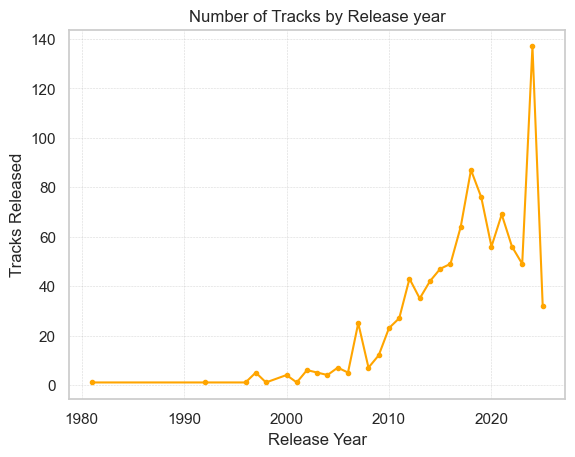

In [217]:
trend_analysis.plot(title = "Number of Tracks by Release year", xlabel = "Release Year", ylabel = "Tracks Released", marker = 'o', markersize = 3, color = 'orange')
plt.grid(True,color='gray', linestyle='--', linewidth=0.4, alpha=0.3)

In [ ]:
##How does popularity vary by decade of release?

In [223]:
df['decade'] = (df['release_year'] // 10) * 10

In [243]:
decade_trend = df.groupby("decade")["popularity"].mean()

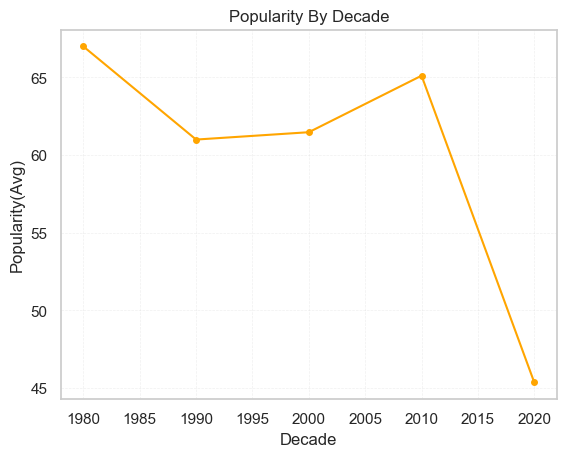

In [253]:
decade_trend.plot(title = "Popularity By Decade", xlabel = "Decade", ylabel = "Popularity(Avg)", marker= 'o', markersize = 4, color = 'orange')
plt.grid(True, linewidth = 0.5, linestyle = '--', alpha = 0.3)

In [257]:
decade_trend.reset_index()

,decade,popularity
0,1980,67.000000
1,1990,61.000000
2,2000,61.473684
3,2010,65.115619
4,2020,45.348371
